In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import explained_variance_score,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Convert Tree To If-else

In [17]:
class Convert_Regression_tree_to_if_else:
  def __init__(self,tree,name,path=None):
    self.tree=tree.tree_
    self.url=name+'.py' if path==None else path+name+'.py'
    self.if_else='def tree_if_else(datapoint):\n\tx=datapoint\n'
    self.NLR(0,1)
    self.Write()
  def NLR(self,node_id,n_space):
    if node_id>=0:
      self.if_else+=(n_space*'\t'+f'if x[{self.tree.feature[node_id]}] <= {self.tree.threshold[node_id]}:\n')
    if self.tree.children_left[self.tree.children_left[node_id]]<0:
      value=self.tree.value[self.tree.children_left[node_id]][0][0]
      self.if_else+=((n_space+1)*'\t'+f'return {value}\n')
    else:
      self.NLR(self.tree.children_left[node_id],n_space+1)
    self.if_else+=(n_space*'\t'+'else:\n')
    if self.tree.children_right[self.tree.children_right[node_id]]<0:
      value=self.tree.value[self.tree.children_right[node_id]][0][0]
      self.if_else+=((n_space+1)*'\t'+f'return {value}\n')
    else:
      self.NLR(self.tree.children_right[node_id],n_space+1)
  def Write(self):
    with open(self.url,'w+') as f:
      f.writelines(self.if_else)
      f.close()

In [18]:
class Convert_Classification_tree_to_if_else:
  def __init__(self,tree,name,path=None):
    self.tree=tree.tree_
    self.url=name+'.py' if path==None else path+name+'.py'
    self.if_else='def tree_if_else(datapoint):\n\tx=datapoint\n'
    self.NLR(0,1)
    self.Write()
  def NLR(self,node_id,n_space):
    if node_id>=0:
      self.if_else+=(n_space*'\t'+f'if x[{self.tree.feature[node_id]}] <= {self.tree.threshold[node_id]}:\n')
    if self.tree.children_left[self.tree.children_left[node_id]]<0:
      value=self.tree.value[self.tree.children_left[node_id]][0]
      class_=0
      for i in range(len(value)):
        if value[i]==max(value):
          class_=i
          break
      self.if_else+=((n_space+1)*'\t'+f'return {class_}\n')
    else:
      self.NLR(self.tree.children_left[node_id],n_space+1)
    self.if_else+=(n_space*'\t'+'else:\n')
    if self.tree.children_right[self.tree.children_right[node_id]]<0:
      value=self.tree.value[self.tree.children_right[node_id]][0]
      class_=0
      for i in range(len(value)):
        if value[i]==max(value):
          class_=i
          break
      self.if_else+=((n_space+1)*'\t'+f'return {class_}\n')
    else:
      self.NLR(self.tree.children_right[node_id],n_space+1)
  def Write(self):
    with open(self.url,'w+') as f:
      f.writelines(self.if_else)
      f.close()

# Classification

##Data

In [22]:
df_heartdisease = pd.read_csv('/content/drive/MyDrive/Decision Tree - Toán Cho Khoa Học Máy Tính/DATA/cleveland-heart-2.csv')
df_heartdisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,53,1,2,120,-9,0,0,132,0,0.0,-9,-9,-9,0
586,48,0,2,-9,308,0,1,-9,-9,2.0,1,-9,-9,0
587,36,1,2,120,166,0,0,180,0,0.0,-9,-9,-9,0
588,48,1,3,110,211,0,0,138,0,0.0,-9,-9,6,0


In [23]:
#CHECK KIND OF SPECIES

df_heartdisease['num'].unique()

array([0, 1])

In [24]:
#FEATURES

heartdisease_X = df_heartdisease.drop('num', axis = 1)
heartdisease_X
#drop the last column aka num column into a single column

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,53,1,2,120,-9,0,0,132,0,0.0,-9,-9,-9
586,48,0,2,-9,308,0,1,-9,-9,2.0,1,-9,-9
587,36,1,2,120,166,0,0,180,0,0.0,-9,-9,-9
588,48,1,3,110,211,0,0,138,0,0.0,-9,-9,6


In [25]:
#label, target, groundtruth

heartdisease_y = df_heartdisease['num'] #column y is the last column in dataset with the name num
heartdisease_y

0      0
1      1
2      1
3      0
4      0
      ..
585    0
586    0
587    0
588    0
589    0
Name: num, Length: 590, dtype: int64

In [26]:
#SPLIT DATA

C_X,C_y=heartdisease_X, heartdisease_y
C_X_train, C_X_test, C_y_train, C_y_test = train_test_split(heartdisease_X, heartdisease_y, test_size = 0.2, random_state = 0) #init parameters


## **Gini**

0.7796610169491526


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


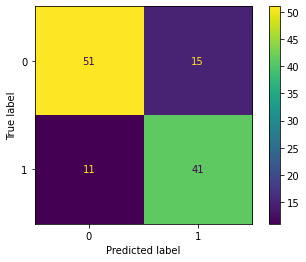

In [ ]:
dt_gini_C=dt=DecisionTreeClassifier()
dt_gini_C.fit(C_X_train,C_y_train)
y_pre=dt.predict(C_X_test)
print(accuracy_score(C_y_test,y_pre))
plot_confusion_matrix(dt_gini_C, C_X_test, C_y_test)  
plt.show()

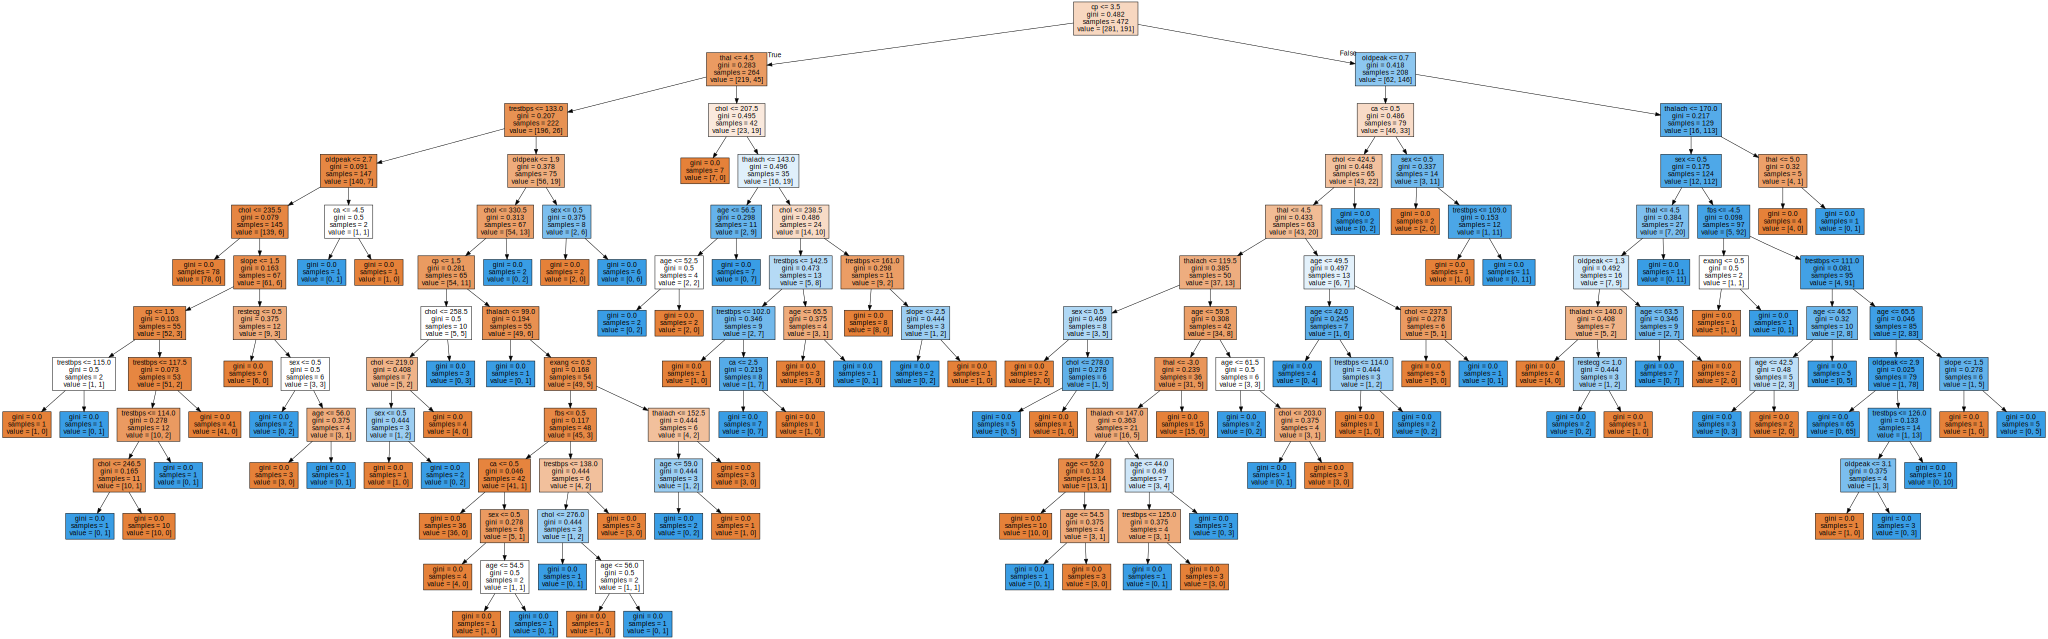

In [ ]:
dot_file = export_graphviz(dt_gini_C, feature_names=list(df_heartdisease.columns)[:13],filled=True)
graph = graphviz.Source(dot_file)
graph
#graph.render(filename='classification_tree_gini', format='png', cleanup=True)

In [ ]:
Convert_Classification_tree_to_if_else(dt_gini_C,'dt_gini_C')
#Khi chạy dòng lệnh trên thì sẽ tạo ra 1 file có tên là dt_gin_C.py chứa hàm chuyển đổi

In [ ]:
def tree_if_else(datapoint):
	x=datapoint
	if x[2] <= 3.5:
		if x[12] <= 4.5:
			if x[3] <= 133.0:
				if x[9] <= 2.700000047683716:
					if x[4] <= 235.5:
						return 0
					else:
						if x[10] <= 1.5:
							if x[2] <= 1.5:
								if x[0] <= 45.0:
									return 1
								else:
									return 0
							else:
								if x[3] <= 117.5:
									if x[3] <= 114.0:
										if x[4] <= 246.5:
											return 1
										else:
											return 0
									else:
										return 1
								else:
									return 0
						else:
							if x[6] <= 0.5:
								return 0
							else:
								if x[1] <= 0.5:
									return 1
								else:
									if x[0] <= 56.0:
										return 0
									else:
										return 1
				else:
					if x[0] <= 36.5:
						return 1
					else:
						return 0
			else:
				if x[9] <= 1.899999976158142:
					if x[4] <= 330.5:
						if x[2] <= 1.5:
							if x[4] <= 258.5:
								if x[4] <= 219.0:
									if x[7] <= 139.0:
										return 0
									else:
										return 1
								else:
									return 0
							else:
								return 1
						else:
							if x[7] <= 99.0:
								return 1
							else:
								if x[8] <= 0.5:
									if x[5] <= 0.5:
										if x[11] <= 0.5:
											return 0
										else:
											if x[6] <= 1.0:
												return 0
											else:
												if x[4] <= 270.0:
													return 1
												else:
													return 0
									else:
										if x[4] <= 236.0:
											return 0
										else:
											if x[4] <= 276.0:
												return 1
											else:
												if x[7] <= 161.0:
													return 1
												else:
													return 0
								else:
									if x[12] <= -3.0:
										if x[0] <= 46.5:
											return 0
										else:
											return 1
									else:
										return 0
					else:
						return 1
				else:
					if x[1] <= 0.5:
						return 0
					else:
						return 1
		else:
			if x[4] <= 207.5:
				return 0
			else:
				if x[7] <= 143.0:
					if x[11] <= -4.5:
						if x[7] <= 138.5:
							return 0
						else:
							return 1
					else:
						return 1
				else:
					if x[4] <= 238.5:
						if x[0] <= 60.0:
							if x[3] <= 102.0:
								return 0
							else:
								if x[3] <= 145.0:
									return 1
								else:
									return 0
						else:
							if x[0] <= 65.5:
								return 0
							else:
								return 1
					else:
						if x[3] <= 161.0:
							return 0
						else:
							if x[10] <= 2.5:
								return 1
							else:
								return 0
	else:
		if x[9] <= 0.7000000178813934:
			if x[11] <= 0.5:
				if x[4] <= 424.5:
					if x[12] <= 4.5:
						if x[7] <= 119.5:
							if x[1] <= 0.5:
								return 0
							else:
								if x[4] <= 278.0:
									return 1
								else:
									return 0
						else:
							if x[0] <= 59.5:
								if x[12] <= -3.0:
									if x[7] <= 147.0:
										if x[0] <= 52.0:
											return 0
										else:
											if x[0] <= 54.5:
												return 1
											else:
												return 0
									else:
										if x[3] <= 125.0:
											return 1
										else:
											if x[0] <= 46.0:
												return 0
											else:
												return 1
								else:
									return 0
							else:
								if x[0] <= 61.5:
									return 1
								else:
									if x[7] <= 143.5:
										return 1
									else:
										return 0
					else:
						if x[0] <= 49.5:
							if x[3] <= 114.0:
								if x[0] <= 42.0:
									return 1
								else:
									return 0
							else:
								return 1
						else:
							if x[1] <= 0.5:
								return 1
							else:
								return 0
				else:
					return 1
			else:
				if x[1] <= 0.5:
					return 0
				else:
					if x[3] <= 109.0:
						return 0
					else:
						return 1
		else:
			if x[7] <= 170.0:
				if x[1] <= 0.5:
					if x[12] <= 4.5:
						if x[9] <= 1.300000011920929:
							if x[7] <= 140.0:
								return 0
							else:
								if x[8] <= 0.5:
									return 0
								else:
									return 1
						else:
							if x[0] <= 63.5:
								return 1
							else:
								return 0
					else:
						return 1
				else:
					if x[5] <= -4.5:
						if x[7] <= 135.0:
							return 0
						else:
							return 1
					else:
						if x[3] <= 111.0:
							if x[4] <= 238.5:
								if x[0] <= 42.5:
									return 1
								else:
									return 0
							else:
								return 1
						else:
							if x[0] <= 65.5:
								if x[9] <= 2.899999976158142:
									return 1
								else:
									if x[7] <= 114.0:
										if x[4] <= 257.5:
											return 1
										else:
											return 0
									else:
										return 1
							else:
								if x[3] <= 152.5:
									return 1
								else:
									return 0
			else:
				if x[0] <= 49.5:
					return 0
				else:
					return 1

y_pre=[]
for i in C_X_test.values:
  y_pre.append(tree_if_else(i))
accuracy_score(C_y_test,y_pre)

0.7796610169491526

## **Entropy**

0.7796610169491526


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


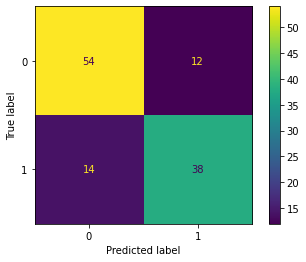

In [ ]:
dt_entropy_C=dt=DecisionTreeClassifier(criterion='entropy')
dt_entropy_C.fit(C_X_train,C_y_train)
y_pre=dt.predict(C_X_test)
print(accuracy_score(C_y_test,y_pre))
plot_confusion_matrix(dt_entropy_C, C_X_test, C_y_test)  
plt.show()

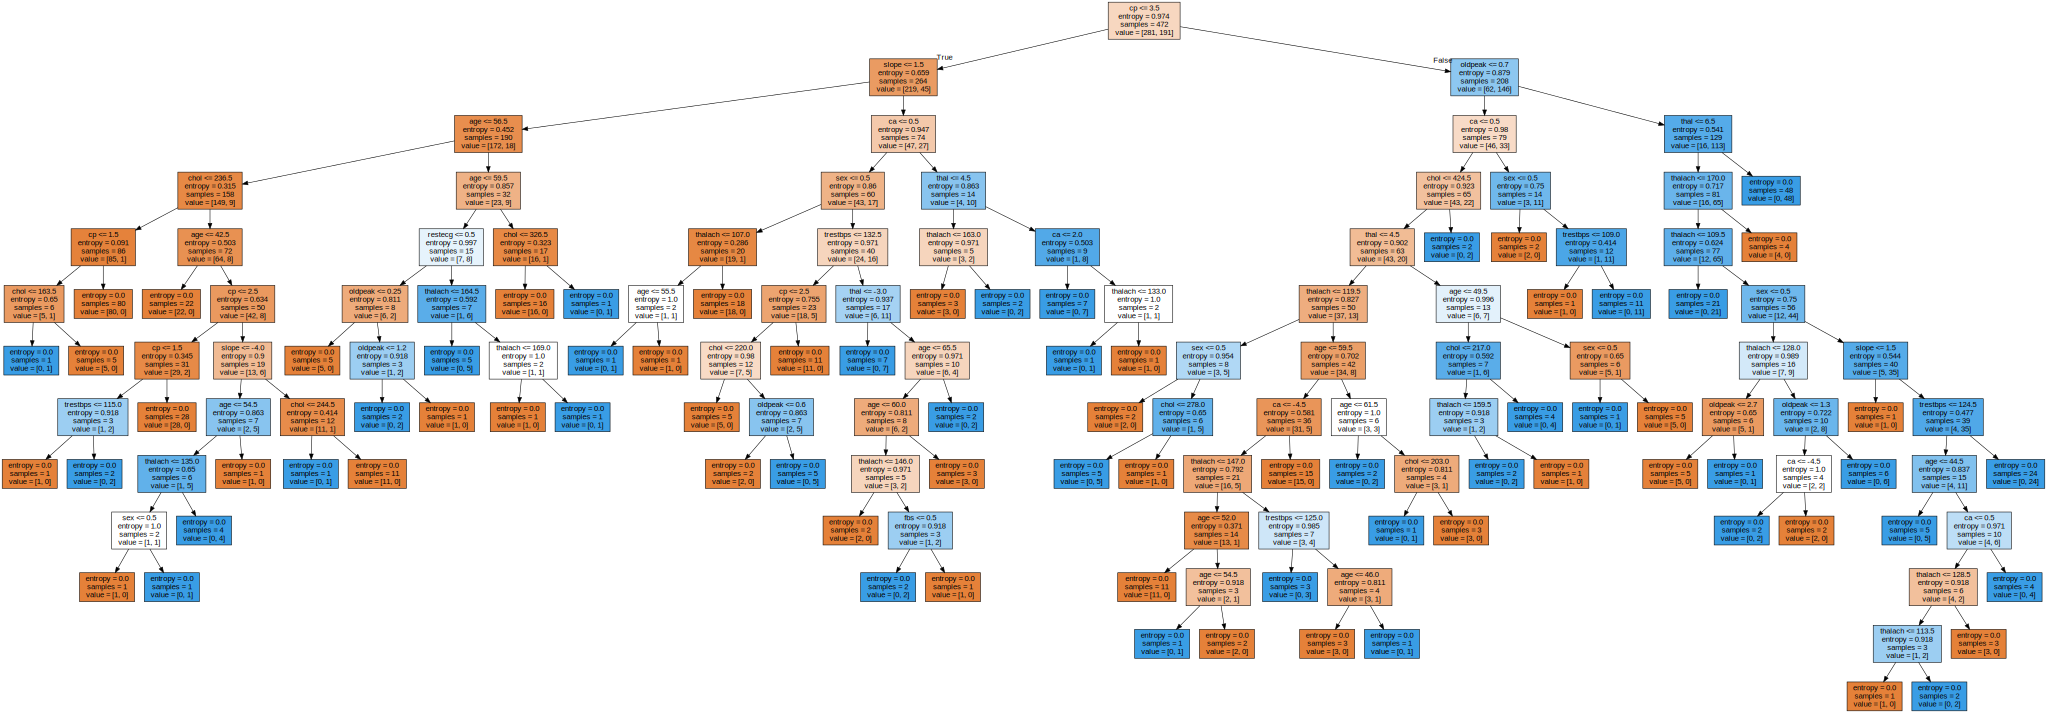

In [ ]:
dot_file = export_graphviz(dt_entropy_C, feature_names=list(df_heartdisease.columns)[:13],filled=True)
graph = graphviz.Source(dot_file)
graph
#graph.render(filename='classification_tree_entropy', format='png', cleanup=True)

In [ ]:
Convert_Classification_tree_to_if_else(dt_entropy_C,'dt_entropy_C')

In [ ]:
def tree_if_else(datapoint):
	x=datapoint
	if x[2] <= 3.5:
		if x[10] <= 1.5:
			if x[0] <= 56.5:
				if x[4] <= 236.5:
					if x[2] <= 1.5:
						if x[4] <= 163.5:
							return 1
						else:
							return 0
					else:
						return 0
				else:
					if x[0] <= 42.5:
						return 0
					else:
						if x[2] <= 2.5:
							if x[2] <= 1.5:
								if x[4] <= 270.0:
									return 0
								else:
									return 1
							else:
								return 0
						else:
							if x[10] <= -4.0:
								if x[3] <= 112.5:
									return 0
								else:
									if x[7] <= 135.0:
										if x[4] <= 396.0:
											return 0
										else:
											return 1
									else:
										return 1
							else:
								if x[4] <= 244.5:
									return 1
								else:
									return 0
			else:
				if x[0] <= 59.5:
					if x[6] <= 0.5:
						if x[9] <= 0.2500000074505806:
							return 0
						else:
							if x[3] <= 142.0:
								return 1
							else:
								return 0
					else:
						if x[4] <= 212.0:
							if x[6] <= 1.5:
								return 1
							else:
								return 0
						else:
							return 1
				else:
					if x[4] <= 326.5:
						return 0
					else:
						return 1
		else:
			if x[11] <= 0.5:
				if x[1] <= 0.5:
					if x[7] <= 107.0:
						if x[8] <= 0.5:
							return 0
						else:
							return 1
					else:
						return 0
				else:
					if x[3] <= 132.5:
						if x[2] <= 2.5:
							if x[4] <= 220.0:
								return 0
							else:
								if x[9] <= 0.6000000014901161:
									return 0
								else:
									return 1
						else:
							return 0
					else:
						if x[11] <= -4.5:
							return 1
						else:
							if x[0] <= 65.5:
								if x[7] <= 146.0:
									return 0
								else:
									if x[5] <= 0.5:
										if x[0] <= 61.5:
											return 1
										else:
											return 0
									else:
										return 0
							else:
								return 1
			else:
				if x[12] <= 4.5:
					if x[7] <= 163.0:
						return 0
					else:
						return 1
				else:
					if x[11] <= 2.0:
						return 1
					else:
						if x[3] <= 145.0:
							return 0
						else:
							return 1
	else:
		if x[9] <= 0.7000000178813934:
			if x[11] <= 0.5:
				if x[4] <= 424.5:
					if x[12] <= 4.5:
						if x[7] <= 119.5:
							if x[1] <= 0.5:
								return 0
							else:
								if x[4] <= 278.0:
									return 1
								else:
									return 0
						else:
							if x[0] <= 59.5:
								if x[12] <= -3.0:
									if x[7] <= 147.0:
										if x[0] <= 52.0:
											return 0
										else:
											if x[0] <= 54.5:
												return 1
											else:
												return 0
									else:
										if x[3] <= 125.0:
											return 1
										else:
											if x[0] <= 46.0:
												return 0
											else:
												return 1
								else:
									return 0
							else:
								if x[0] <= 61.5:
									return 1
								else:
									if x[4] <= 203.0:
										return 1
									else:
										return 0
					else:
						if x[0] <= 49.5:
							if x[4] <= 217.0:
								if x[7] <= 159.5:
									return 1
								else:
									return 0
							else:
								return 1
						else:
							if x[1] <= 0.5:
								return 1
							else:
								return 0
				else:
					return 1
			else:
				if x[1] <= 0.5:
					return 0
				else:
					if x[3] <= 109.0:
						return 0
					else:
						return 1
		else:
			if x[12] <= 6.5:
				if x[7] <= 170.0:
					if x[7] <= 109.5:
						return 1
					else:
						if x[1] <= 0.5:
							if x[7] <= 128.0:
								if x[9] <= 2.700000047683716:
									return 0
								else:
									return 1
							else:
								if x[9] <= 1.300000011920929:
									if x[11] <= -4.5:
										return 1
									else:
										return 0
								else:
									return 1
						else:
							if x[10] <= 1.5:
								return 0
							else:
								if x[3] <= 124.5:
									if x[0] <= 44.5:
										return 1
									else:
										if x[11] <= 0.5:
											if x[7] <= 128.5:
												if x[3] <= 122.0:
													return 1
												else:
													return 0
											else:
												return 0
										else:
											return 1
								else:
									return 1
				else:
					return 0
			else:
				return 1

y_pre=[]
for i in C_X_test.values:
  y_pre.append(tree_if_else(i))
accuracy_score(C_y_test,y_pre)

0.7796610169491526

# Regression

##Data

In [4]:
data=pd.read_csv('/content/drive/MyDrive/Decision Tree - Toán Cho Khoa Học Máy Tính/DATA/Advertising.csv')
print(data)

        TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


In [5]:
R_X=data.iloc[:,:3].values
R_y=data['sales'].values

R_X_train,R_X_test,R_y_train,R_y_test=train_test_split(R_X,R_y)

##Build Tree

In [ ]:
R_dt=DecisionTreeRegressor()
R_dt.fit(R_X_train,R_y_train)
y_pre=R_dt.predict(R_X_test)
explained_variance_score(R_y_test,y_pre)

0.9474468234084685

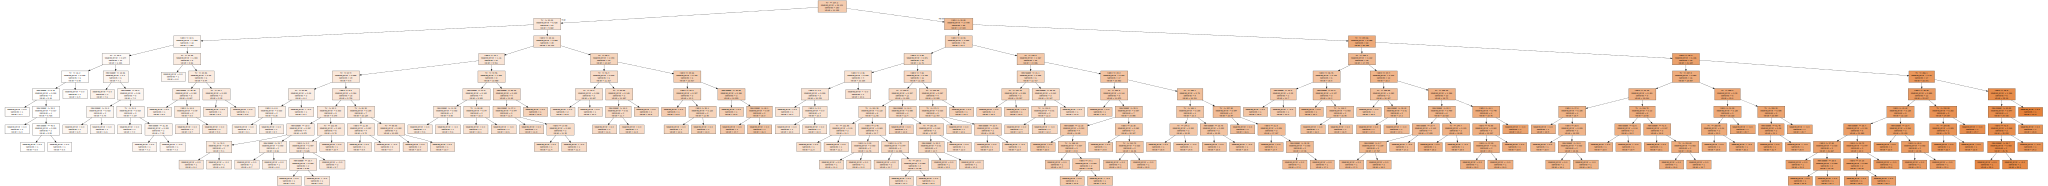

In [ ]:
dot_file = export_graphviz(R_dt, feature_names=data.columns[:3].values,filled=True)
graph = graphviz.Source(dot_file)
graph
#graph.render(filename='regression_tree', format='png', cleanup=True)

In [ ]:
Convert_Regression_tree_to_if_else(R_dt,'R_dt')

In [ ]:
def tree_if_else(datapoint):
	x=datapoint
	if x[0] <= 107.20000076293945:
		if x[0] <= 30.050000190734863:
			if x[1] <= 32.499999046325684:
				if x[0] <= 18.0:
					if x[0] <= 15.200000286102295:
						if x[2] <= 5.749999761581421:
							return 5.7
						else:
							if x[2] <= 33.500000953674316:
								return 5.3
							else:
								if x[2] <= 45.5:
									return 5.5
								else:
									return 5.6
					else:
						return 5.9
				else:
					if x[2] <= 18.850000381469727:
						return 7.6
					else:
						if x[2] <= 26.0:
							if x[2] <= 21.5:
								return 6.9
							else:
								return 6.6
						else:
							if x[0] <= 21.899999618530273:
								return 7.0
							else:
								if x[2] <= 31.350000381469727:
									return 7.2
								else:
									return 7.3
			else:
				if x[0] <= 12.349999904632568:
					return 6.6
				else:
					if x[0] <= 20.84999942779541:
						if x[2] <= 45.45000171661377:
							return 8.0
						else:
							if x[1] <= 44.80000114440918:
								return 8.7
							else:
								return 9.3
					else:
						if x[0] <= 24.699999809265137:
							return 9.2
						else:
							return 9.5
		else:
			if x[1] <= 28.15000057220459:
				if x[1] <= 13.700000286102295:
					if x[0] <= 57.89999961853027:
						if x[0] <= 54.85000038146973:
							if x[1] <= 6.800000190734863:
								return 8.1
							else:
								return 8.4
						else:
							return 8.7
					else:
						if x[1] <= 8.600000143051147:
							if x[0] <= 92.29999923706055:
								if x[2] <= 19.000000476837158:
									if x[0] <= 78.29999923706055:
										return 9.4
									else:
										return 8.8
								else:
									if x[2] <= 23.700000762939453:
										return 8.7
									else:
										return 8.6
							else:
								if x[0] <= 101.04999923706055:
									if x[1] <= 3.200000047683716:
										if x[2] <= 18.700000047683716:
											return 9.5
										else:
											return 9.6
									else:
										return 9.7
								else:
									return 10.4
						else:
							if x[0] <= 81.3499984741211:
								if x[1] <= 11.25:
									return 9.9
								else:
									return 9.7
							else:
								if x[0] <= 95.04999923706055:
									return 10.6
								else:
									return 10.7
				else:
					if x[0] <= 72.95000076293945:
						if x[2] <= 27.799999237060547:
							if x[2] <= 11.350000023841858:
								return 9.5
							else:
								return 9.6
						else:
							if x[0] <= 56.849998474121094:
								return 10.1
							else:
								return 10.5
					else:
						if x[2] <= 56.150001525878906:
							if x[2] <= 27.399999618530273:
								return 11.8
							else:
								if x[1] <= 17.549999713897705:
									return 11.4
								else:
									return 11.3
						else:
							return 12.9
			else:
				if x[0] <= 68.10000228881836:
					if x[0] <= 46.39999961853027:
						if x[0] <= 42.0:
							return 10.8
						else:
							return 10.4
					else:
						if x[0] <= 62.650001525878906:
							if x[2] <= 16.0:
								return 11.6
							else:
								return 11.8
						else:
							return 12.5
				else:
					if x[1] <= 39.64999961853027:
						if x[1] <= 32.30000019073486:
							return 14.0
						else:
							if x[1] <= 35.39999961853027:
								return 12.6
							else:
								return 13.3
					else:
						if x[2] <= 40.64999961853027:
							return 13.6
						else:
							if x[2] <= 48.10000038146973:
								return 14.7
							else:
								return 15.3
	else:
		if x[1] <= 26.84999942779541:
			if x[1] <= 10.050000190734863:
				if x[1] <= 2.8499999046325684:
					if x[1] <= 2.3499999046325684:
						if x[1] <= 1.5999999642372131:
							return 10.1
						else:
							if x[1] <= 1.9999999403953552:
								return 10.3
							else:
								return 10.3
					else:
						return 10.6
				else:
					if x[1] <= 7.6499998569488525:
						if x[0] <= 229.89999389648438:
							if x[0] <= 151.3499984741211:
								if x[0] <= 131.8499984741211:
									return 11.0
								else:
									return 11.2
							else:
								if x[1] <= 3.450000047683716:
									if x[1] <= 3.25:
										return 11.4
									else:
										return 11.5
								else:
									if x[1] <= 4.75:
										return 11.7
									else:
										if x[0] <= 187.5999984741211:
											return 11.7
										else:
											return 12.2
						else:
							if x[2] <= 14.0:
								return 12.8
							else:
								if x[0] <= 251.3499984741211:
									if x[2] <= 30.200000762939453:
										return 12.5
									else:
										return 12.3
								else:
									return 12.0
					else:
						if x[0] <= 216.3499984741211:
							if x[0] <= 171.3000030517578:
								return 12.6
							else:
								if x[2] <= 16.399999856948853:
									return 12.8
								else:
									return 12.9
						else:
							return 13.4
			else:
				if x[0] <= 140.3000030517578:
					if x[2] <= 21.100000381469727:
						if x[0] <= 137.75:
							return 13.2
						else:
							return 13.4
					else:
						if x[2] <= 35.14999961853027:
							if x[0] <= 124.5:
								return 12.4
							else:
								return 12.2
						else:
							return 11.9
				else:
					if x[1] <= 19.199999809265137:
						if x[0] <= 181.79999542236328:
							return 14.1
						else:
							if x[2] <= 25.90000057220459:
								if x[2] <= 12.149999856948853:
									return 15.0
								else:
									if x[0] <= 188.14999389648438:
										return 14.7
									else:
										if x[1] <= 14.100000381469727:
											return 14.8
										else:
											return 14.9
							else:
								if x[1] <= 16.34999990463257:
									return 14.8
								else:
									if x[0] <= 210.75:
										return 15.2
									else:
										return 15.5
					else:
						if x[0] <= 192.70000457763672:
							if x[0] <= 166.0999984741211:
								if x[0] <= 144.3000030517578:
									return 15.5
								else:
									return 14.6
							else:
								if x[2] <= 15.75:
									return 15.6
								else:
									return 15.5
						else:
							if x[0] <= 207.9499969482422:
								return 16.6
							else:
								if x[1] <= 21.800000190734863:
									return 17.4
								else:
									if x[2] <= 35.34999942779541:
										return 17.0
									else:
										return 17.1
		else:
			if x[0] <= 194.54999542236328:
				if x[0] <= 128.4000015258789:
					if x[1] <= 35.75:
						if x[2] <= 13.299999713897705:
							return 15.2
						else:
							return 14.2
					else:
						if x[2] <= 57.30000114440918:
							return 16.7
						else:
							if x[0] <= 118.19999694824219:
								return 16.0
							else:
								return 15.9
				else:
					if x[1] <= 34.400001525878906:
						if x[0] <= 159.9499969482422:
							return 15.0
						else:
							if x[2] <= 28.450000762939453:
								return 17.3
							else:
								return 17.1
					else:
						if x[0] <= 165.1500015258789:
							if x[2] <= 52.20000076293945:
								if x[2] <= 37.40000057220459:
									if x[2] <= 6.700000047683716:
										return 17.3
									else:
										return 18.0
								else:
									return 17.2
							else:
								if x[0] <= 144.6999969482422:
									return 19.2
								else:
									return 18.5
						else:
							if x[1] <= 44.10000038146973:
								if x[1] <= 40.85000038146973:
									if x[1] <= 37.55000114440918:
										return 19.2
									else:
										return 19.0
								else:
									return 19.6
							else:
								return 21.2
			else:
				if x[1] <= 35.29999923706055:
					if x[0] <= 237.79999542236328:
						if x[1] <= 31.449999809265137:
							if x[1] <= 27.600000381469727:
								return 18.9
							else:
								if x[1] <= 28.600000381469727:
									return 18.0
								else:
									if x[2] <= 24.000000476837158:
										return 18.4
									else:
										return 18.3
						else:
							if x[0] <= 218.75:
								if x[2] <= 52.5:
									return 19.0
								else:
									return 19.4
							else:
								if x[2] <= 41.5:
									return 20.1
								else:
									if x[0] <= 224.6500015258789:
										return 19.6
									else:
										return 19.7
					else:
						if x[0] <= 268.20001220703125:
							if x[1] <= 31.549999237060547:
								if x[0] <= 259.0500030517578:
									return 19.8
								else:
									return 20.2
							else:
								return 20.7
						else:
							if x[0] <= 293.25:
								if x[2] <= 51.45000076293945:
									return 21.4
								else:
									return 20.8
							else:
								return 20.7
				else:
					if x[0] <= 256.09999084472656:
						if x[1] <= 48.35000038146973:
							if x[1] <= 43.45000076293945:
								if x[2] <= 36.69999885559082:
									if x[1] <= 37.85000038146973:
										return 21.5
									else:
										if x[2] <= 28.5:
											return 21.8
										else:
											return 21.7
								else:
									if x[1] <= 39.75:
										if x[1] <= 37.14999961853027:
											return 22.2
										else:
											return 22.1
									else:
										return 22.6
							else:
								if x[2] <= 23.40000057220459:
									return 22.6
								else:
									if x[1] <= 45.80000114440918:
										return 22.3
									else:
										return 22.4
						else:
							if x[0] <= 215.5500030517578:
								if x[0] <= 204.8499984741211:
									return 23.7
								else:
									return 23.8
							else:
								return 24.7
					else:
						if x[1] <= 45.80000114440918:
							if x[2] <= 83.54999923706055:
								if x[1] <= 42.5:
									if x[2] <= 58.69999885559082:
										return 25.4
									else:
										return 25.5
								else:
									return 24.2
							else:
								return 23.8
						else:
							return 27.0
y_pre=[]
for i in R_X_test:
  y_pre.append(tree_if_else(i))
explained_variance_score(R_y_test,y_pre)

0.9502384477481015

# **Pruning**

## **Pre-Pruning**

### Regression

In [ ]:
param_tree={
   'max_leaf_nodes':[i for i in range(2,20)],
   'max_depth':[i for i in range(1,20)],
   'min_samples_leaf':[i for i in range(1,20)]
}
R_dt_prep=DecisionTreeRegressor()
gs=GridSearchCV(R_dt_prep,param_tree)
gs.fit(R_X,R_y)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]})

In [ ]:
print(f"best pram: {gs.best_params_}")
print(f"best score: {gs.best_score_}")

best pram: {'max_depth': 7, 'max_leaf_nodes': 19, 'min_samples_leaf': 1}
best score: 0.930864992544216


In [ ]:
R_dt_prep=DecisionTreeRegressor(max_depth=6,max_leaf_nodes=19, min_samples_leaf= 1)
R_dt_prep.fit(R_X_train,R_y_train)

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=19)

In [ ]:
y_pre=R_dt_prep.predict(R_X_test)
explained_variance_score(R_y_test,y_pre)

0.9234434854440375

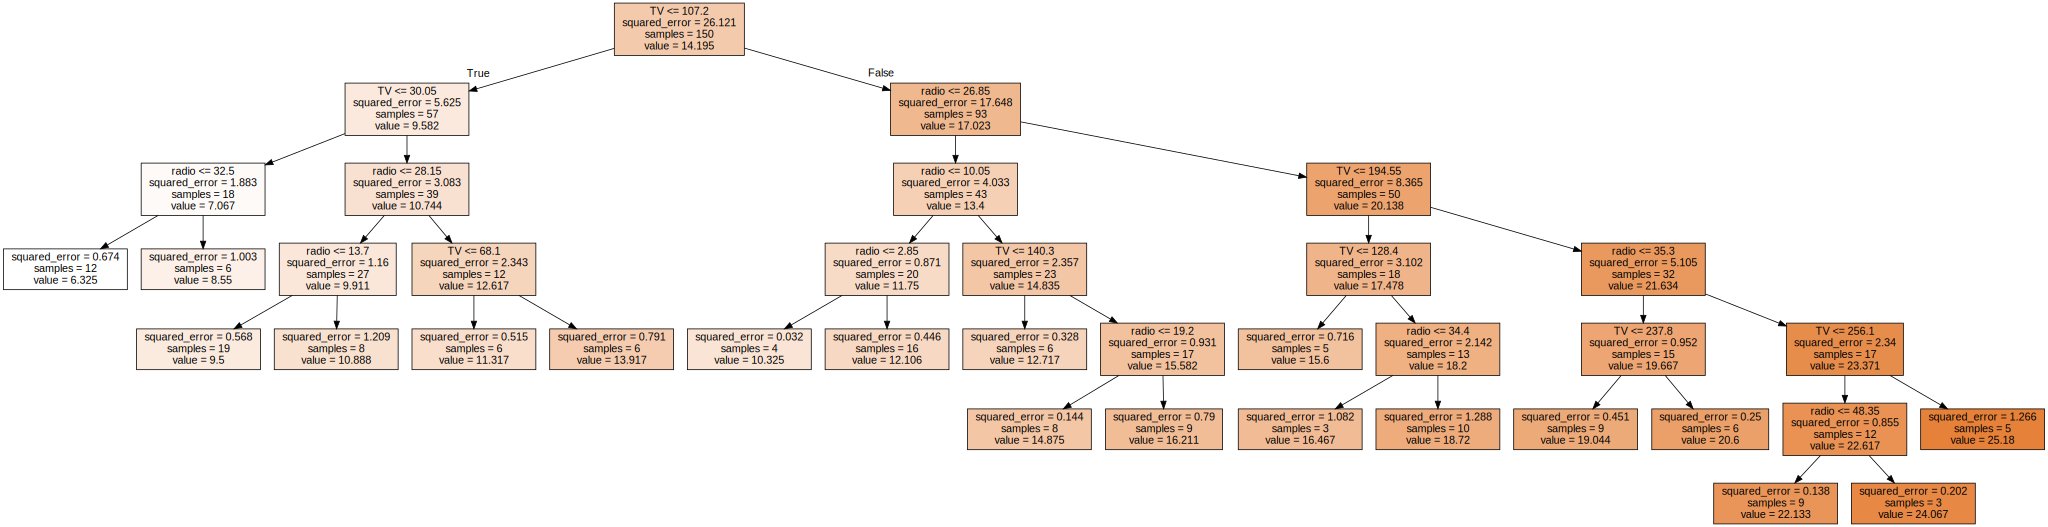

In [ ]:
dot_file = export_graphviz(R_dt_prep, feature_names=data.columns[:3].values,filled=True)
graph = graphviz.Source(dot_file)
graph
#graph.render(filename='regression_tree_pp', format='png', cleanup=True)

In [ ]:
Convert_Regression_tree_to_if_else(R_dt_prep,'R_dt_prep')

In [ ]:
def tree_if_else(datapoint):
	x=datapoint
	if x[0] <= 107.20000076293945:
		if x[0] <= 30.050000190734863:
			if x[1] <= 32.499999046325684:
				return 6.325
			else:
				return 8.549999999999999
		else:
			if x[1] <= 28.15000057220459:
				if x[1] <= 13.700000286102295:
					return 9.499999999999998
				else:
					return 10.887500000000001
			else:
				if x[0] <= 68.10000228881836:
					return 11.316666666666668
				else:
					return 13.916666666666666
	else:
		if x[1] <= 26.84999942779541:
			if x[1] <= 10.050000190734863:
				if x[1] <= 2.8499999046325684:
					return 10.325
				else:
					return 12.10625
			else:
				if x[0] <= 140.3000030517578:
					return 12.716666666666667
				else:
					if x[1] <= 19.199999809265137:
						return 14.875000000000002
					else:
						return 16.211111111111112
		else:
			if x[0] <= 194.54999542236328:
				if x[0] <= 128.4000015258789:
					return 15.6
				else:
					if x[1] <= 34.400001525878906:
						return 16.466666666666665
					else:
						return 18.719999999999995
			else:
				if x[1] <= 35.29999923706055:
					if x[0] <= 237.79999542236328:
						return 19.044444444444444
					else:
						return 20.599999999999998
				else:
					if x[0] <= 256.09999084472656:
						if x[1] <= 48.35000038146973:
							return 22.133333333333333
						else:
							return 24.066666666666666
					else:
						return 25.18

y_pre=[]
for i in R_X_test:
  y_pre.append(tree_if_else(i))
explained_variance_score(R_y_test,y_pre)

0.9234434854440375

### Classification

####**Entropy**

In [ ]:
param_tree={
   'max_leaf_nodes':[i for i in range(2,20)],
   'max_depth':[i for i in range(1,20)],
   'min_samples_leaf':[i for i in range(1,20)]
}
C_dt_entropy_prep=DecisionTreeClassifier(criterion='entropy')
gs=GridSearchCV(C_dt_entropy_prep,param_tree,scoring='accuracy')
gs.fit(C_X,C_y)

#y_pre=dt.predict(X_test)
#accuracy_score(y_test,y_pre)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [ ]:
print(f"best pram: {gs.best_params_}")
print(f"best score: {gs.best_score_}")

best pram: {'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_leaf': 13}
best score: 0.7966101694915254


In [ ]:
C_dt_entropy_prep=DecisionTreeClassifier(max_depth=4,max_leaf_nodes=10,min_samples_leaf=13,criterion='entropy')
C_dt_entropy_prep.fit(C_X_train,C_y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10,
                       min_samples_leaf=13)

0.7372881355932204


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


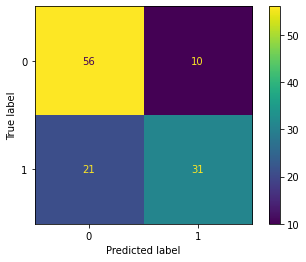

In [ ]:
y_pre=C_dt_entropy_prep.predict(C_X_test)
print(accuracy_score(C_y_test,y_pre))
plot_confusion_matrix(C_dt_entropy_prep, C_X_test, C_y_test)  
plt.show()

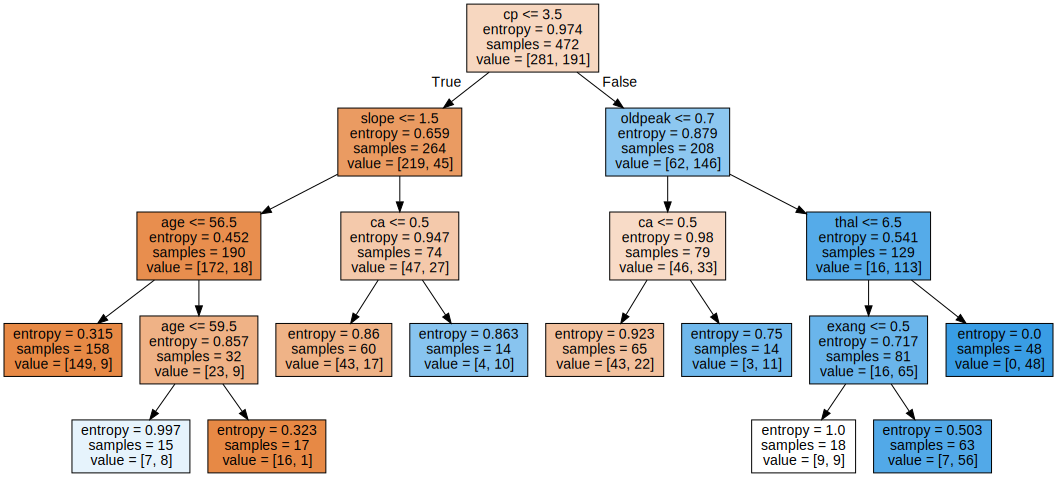

In [ ]:
dot_file = export_graphviz(C_dt_entropy_prep, feature_names=list(df_heartdisease.columns)[:13],filled=True)
graph = graphviz.Source(dot_file)
graph
#graph.render(filename='tree_entropy_after_prunt', format='png', cleanup=True)

In [ ]:
Convert_Classification_tree_to_if_else(C_dt_entropy_prep,'C_dt_entropy_prep')

In [ ]:
def tree_if_else(datapoint):
	x=datapoint
	if x[2] <= 3.5:
		if x[10] <= 1.5:
			if x[0] <= 56.5:
				return 0
			else:
				if x[0] <= 59.5:
					return 1
				else:
					return 0
		else:
			if x[11] <= 0.5:
				return 0
			else:
				return 1
	else:
		if x[9] <= 0.7000000178813934:
			if x[11] <= 0.5:
				return 0
			else:
				return 1
		else:
			if x[12] <= 6.5:
				if x[8] <= 0.5:
					return 0
				else:
					return 1
			else:
				return 1

y_pre=[]
for i in C_X_test.values:
  y_pre.append(tree_if_else(i))
accuracy_score(C_y_test,y_pre)

0.7372881355932204

#### **Gini**

In [ ]:
param_tree={
   'max_leaf_nodes':[i for i in range(2,20)],
   'max_depth':[i for i in range(1,20)],
   'min_samples_leaf':[i for i in range(1,20)]
}
C_dt_gini_prep=DecisionTreeClassifier()
gs=GridSearchCV(C_dt_gini_prep,param_tree,scoring='accuracy')
gs.fit(C_X,C_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [ ]:
print(f"best pram: {gs.best_params_}")
print(f"best score: {gs.best_score_}")

best pram: {'max_depth': 4, 'max_leaf_nodes': 9, 'min_samples_leaf': 3}
best score: 0.8050847457627119


In [ ]:
C_dt_gini_prep=DecisionTreeClassifier(max_depth=4,max_leaf_nodes=9,min_samples_leaf=1)
C_dt_gini_prep.fit(C_X_train,C_y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=9)

0.788135593220339


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


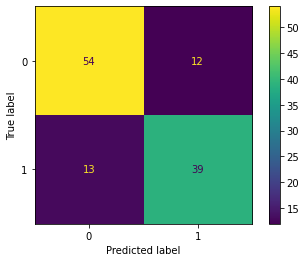

In [ ]:
y_pre=C_dt_gini_prep.predict(C_X_test)
print(accuracy_score(C_y_test,y_pre))
plot_confusion_matrix(C_dt_gini_prep, C_X_test, C_y_test)  
plt.show()

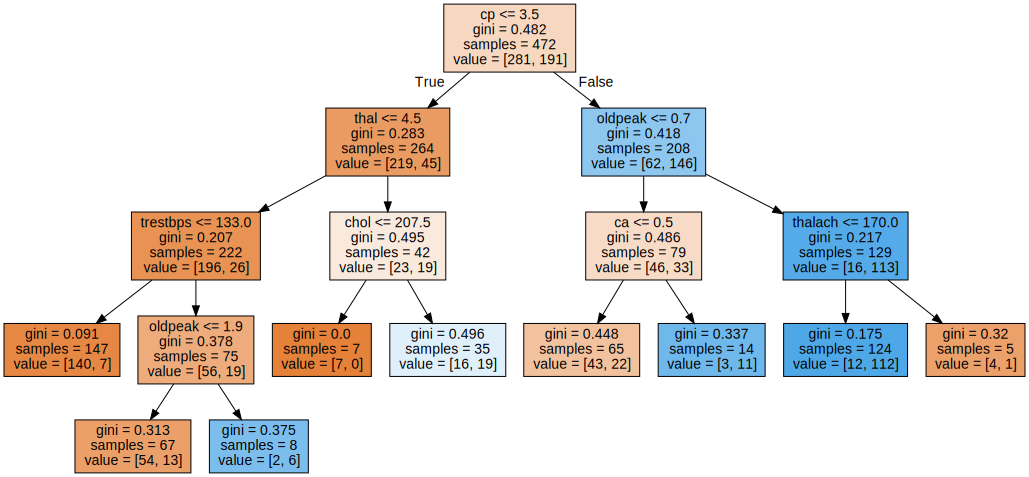

In [ ]:
dot_file = export_graphviz(C_dt_gini_prep, feature_names=list(df_heartdisease.columns)[:13],filled=True)
graph = graphviz.Source(dot_file)
graph
#graph.render(filename='tree_gini_after_prunt', format='png', cleanup=True)

In [ ]:
Convert_Classification_tree_to_if_else(C_dt_gini_prep,'C_dt_gini_prep')

In [ ]:
def tree_if_else(datapoint):
	x=datapoint
	if x[2] <= 3.5:
		if x[12] <= 4.5:
			if x[3] <= 133.0:
				return 0
			else:
				if x[9] <= 1.899999976158142:
					return 0
				else:
					return 1
		else:
			if x[4] <= 207.5:
				return 0
			else:
				return 1
	else:
		if x[9] <= 0.7000000178813934:
			if x[11] <= 0.5:
				return 0
			else:
				return 1
		else:
			if x[7] <= 170.0:
				return 1
			else:
				return 0
y_pre=[]
for i in C_X_test.values:
  y_pre.append(tree_if_else(i))
accuracy_score(C_y_test,y_pre)

0.788135593220339

## **Post-Pruning**

### **Classification**

#####**Entropy**

In [27]:
#Tìm alpha tối ưu
C_dt_entropy_postp=DecisionTreeClassifier(criterion='entropy')
path = C_dt_entropy_postp.cost_complexity_pruning_path(C_X_train,C_y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

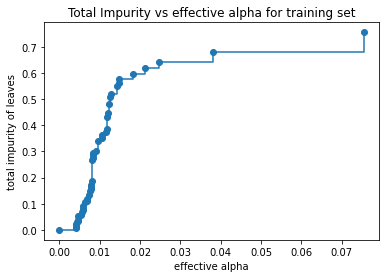

In [28]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [29]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha,criterion='entropy')
    clf.fit(C_X_train,C_y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.21783817903784541


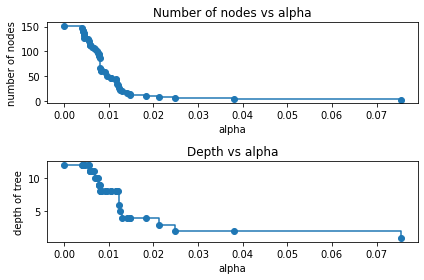

In [30]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


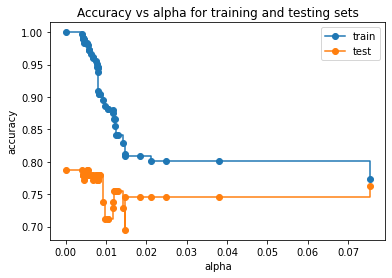

In [31]:
train_scores = [clf.score(C_X_train,C_y_train) for clf in clfs]
test_scores = [clf.score(C_X_test,C_y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

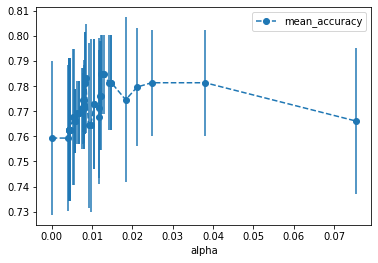

In [32]:
alpha_loop_values=[]

for ccp_alpha in ccp_alphas:
  clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha,criterion='entropy')
  scores=cross_val_score(clf_dt, C_X,C_y,cv=5)
  alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [33]:
ideal_alphas=alpha_results[(alpha_results['mean_accuracy']>0.78)]
ideal_alphas

,alpha,mean_accuracy,std
24,0.008263,0.781356,0.020339
25,0.008263,0.781356,0.020339
26,0.008391,0.783051,0.021837
35,0.012270,0.784746,0.015718
36,0.012452,0.784746,0.015718
37,0.012906,0.784746,0.015718
38,0.014197,0.781356,0.018874
39,0.014700,0.781356,0.018874
40,0.014809,0.781356,0.018874
43,0.024776,0.781356,0.021033


In [34]:
ideal_alpha=ideal_alphas[ideal_alphas['mean_accuracy']==np.max(ideal_alphas['mean_accuracy'])]

In [35]:
C_dt_entropy_postp=DecisionTreeClassifier(ccp_alpha=ideal_alpha.values[0][0],criterion='entropy')
C_dt_entropy_postp.fit(C_X_train,C_y_train)

DecisionTreeClassifier(ccp_alpha=0.012269515882000608, criterion='entropy')

0.7542372881355932


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


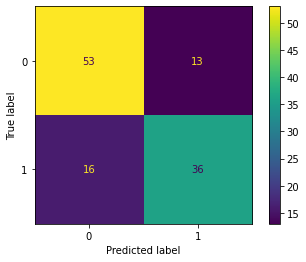

In [36]:
y_pre=C_dt_entropy_postp.predict(C_X_test)
print(accuracy_score(C_y_test,y_pre))
plot_confusion_matrix(C_dt_entropy_postp, C_X_test, C_y_test)  
plt.show()

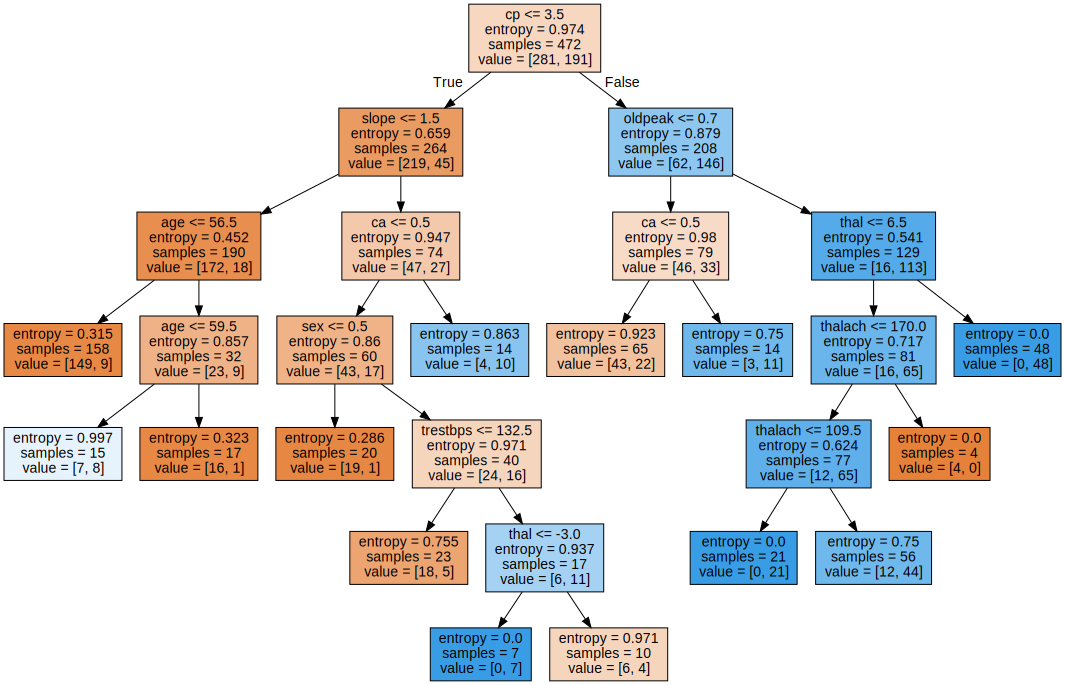

In [37]:
dot_file = export_graphviz(C_dt_entropy_postp, feature_names=list(df_heartdisease.columns)[:13],filled=True)
graph = graphviz.Source(dot_file)
graph

In [ ]:
Convert_Classification_tree_to_if_else(C_dt_entropy_postp,'C_dt_entropy_postp')

In [ ]:
def tree_if_else(datapoint):
	x=datapoint
	if x[2] <= 3.5:
		if x[10] <= 1.5:
			if x[0] <= 56.5:
				if x[4] <= 236.5:
					if x[2] <= 1.5:
						if x[4] <= 163.5:
							return 1
						else:
							return 0
					else:
						return 0
				else:
					if x[0] <= 42.5:
						return 0
					else:
						if x[2] <= 2.5:
							if x[2] <= 1.5:
								if x[4] <= 270.0:
									return 0
								else:
									return 1
							else:
								return 0
						else:
							if x[10] <= -4.0:
								if x[3] <= 112.5:
									return 0
								else:
									if x[7] <= 135.0:
										if x[1] <= 0.5:
											return 0
										else:
											return 1
									else:
										return 1
							else:
								if x[4] <= 244.5:
									return 1
								else:
									return 0
			else:
				if x[0] <= 59.5:
					if x[6] <= 0.5:
						if x[9] <= 0.2500000074505806:
							return 0
						else:
							if x[5] <= 0.5:
								return 1
							else:
								return 0
					else:
						if x[4] <= 212.0:
							if x[3] <= 150.0:
								return 0
							else:
								return 1
						else:
							return 1
				else:
					if x[4] <= 326.5:
						return 0
					else:
						return 1
		else:
			if x[11] <= 0.5:
				if x[1] <= 0.5:
					if x[7] <= 107.0:
						if x[4] <= 301.0:
							return 1
						else:
							return 0
					else:
						return 0
				else:
					if x[3] <= 132.5:
						if x[2] <= 2.5:
							if x[4] <= 220.0:
								return 0
							else:
								if x[9] <= 0.6000000014901161:
									return 0
								else:
									return 1
						else:
							return 0
					else:
						if x[12] <= -3.0:
							return 1
						else:
							if x[0] <= 65.5:
								if x[7] <= 146.0:
									return 0
								else:
									if x[5] <= 0.5:
										if x[0] <= 61.5:
											return 1
										else:
											return 0
									else:
										return 0
							else:
								return 1
			else:
				if x[12] <= 4.5:
					if x[7] <= 163.0:
						return 0
					else:
						return 1
				else:
					if x[11] <= 2.0:
						return 1
					else:
						if x[2] <= 2.5:
							return 1
						else:
							return 0
	else:
		if x[9] <= 0.7000000178813934:
			if x[11] <= 0.5:
				if x[4] <= 424.5:
					if x[12] <= 4.5:
						if x[7] <= 119.5:
							if x[1] <= 0.5:
								return 0
							else:
								if x[4] <= 278.0:
									return 1
								else:
									return 0
						else:
							if x[0] <= 59.5:
								if x[12] <= -3.0:
									if x[7] <= 147.0:
										if x[0] <= 52.0:
											return 0
										else:
											if x[0] <= 54.5:
												return 1
											else:
												return 0
									else:
										if x[0] <= 44.0:
											if x[3] <= 125.0:
												return 1
											else:
												return 0
										else:
											return 1
								else:
									return 0
							else:
								if x[0] <= 61.5:
									return 1
								else:
									if x[7] <= 143.5:
										return 1
									else:
										return 0
					else:
						if x[0] <= 49.5:
							if x[3] <= 114.0:
								if x[0] <= 42.0:
									return 1
								else:
									return 0
							else:
								return 1
						else:
							if x[4] <= 237.5:
								return 0
							else:
								return 1
				else:
					return 1
			else:
				if x[3] <= 109.0:
					return 0
				else:
					if x[1] <= 0.5:
						return 0
					else:
						return 1
		else:
			if x[12] <= 6.5:
				if x[7] <= 170.0:
					if x[7] <= 109.5:
						return 1
					else:
						if x[1] <= 0.5:
							if x[7] <= 128.0:
								if x[9] <= 2.700000047683716:
									return 0
								else:
									return 1
							else:
								if x[9] <= 1.300000011920929:
									if x[11] <= -4.5:
										return 1
									else:
										return 0
								else:
									return 1
						else:
							if x[10] <= 1.5:
								return 0
							else:
								if x[3] <= 124.5:
									if x[0] <= 44.5:
										return 1
									else:
										if x[11] <= 0.5:
											if x[7] <= 128.5:
												if x[3] <= 122.0:
													return 1
												else:
													return 0
											else:
												return 0
										else:
											return 1
								else:
									return 1
				else:
					return 0
			else:
				return 1

y_pre=[]
for i in C_X_test.values:
  y_pre.append(tree_if_else(i))
accuracy_score(C_y_test,y_pre)

0.7711864406779662

#####**Gini**

In [ ]:
#Tìm alpha tối ưu
C_dt_entropy_postp=DecisionTreeClassifier()
path = C_dt_entropy_postp.cost_complexity_pruning_path(C_X_train,C_y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

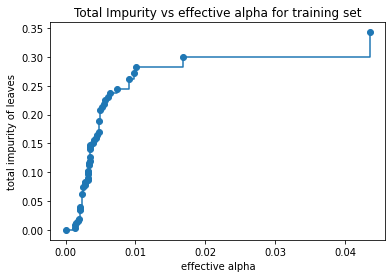

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(C_X_train,C_y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1392413963514222


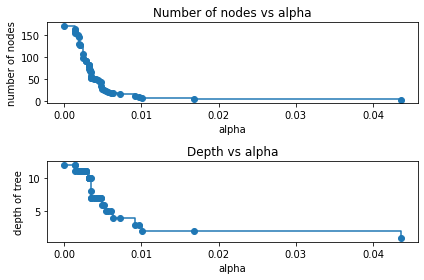

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


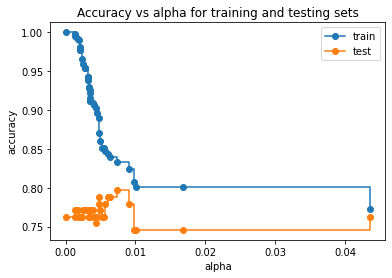

In [ ]:
train_scores = [clf.score(C_X_train,C_y_train) for clf in clfs]
test_scores = [clf.score(C_X_test,C_y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

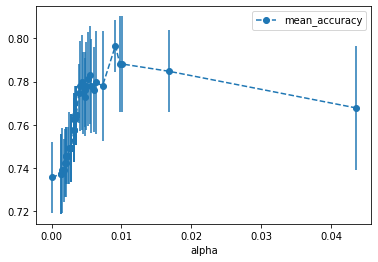

In [ ]:
alpha_loop_values=[]

for ccp_alpha in ccp_alphas:
  clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
  scores=cross_val_score(clf_dt, C_X,C_y,cv=5)
  alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [ ]:
ideal_alphas=alpha_results[(alpha_results['mean_accuracy']>0.78)&(alpha_results['alpha']<=0.01)]
ideal_alphas

,alpha,mean_accuracy,std
33,0.005153,0.781356,0.021706
34,0.005479,0.783051,0.022486
39,0.009133,0.796610,0.011985
40,0.009764,0.788136,0.022099


In [ ]:
ideal_alpha=ideal_alphas[ideal_alphas['mean_accuracy']==np.max(ideal_alphas['mean_accuracy'])]

In [ ]:
C_dt_gini_postp=DecisionTreeClassifier(ccp_alpha=ideal_alpha.values[0][0])
C_dt_gini_postp.fit(C_X_train,C_y_train)

DecisionTreeClassifier(ccp_alpha=0.009132788872859718)

0.7796610169491526


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


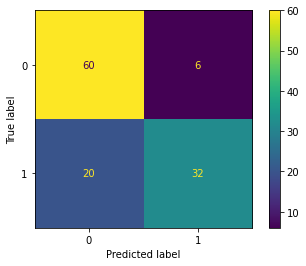

In [ ]:
y_pre=C_dt_gini_postp.predict(C_X_test)
print(accuracy_score(C_y_test,y_pre))
plot_confusion_matrix(C_dt_gini_postp, C_X_test, C_y_test)  
plt.show()

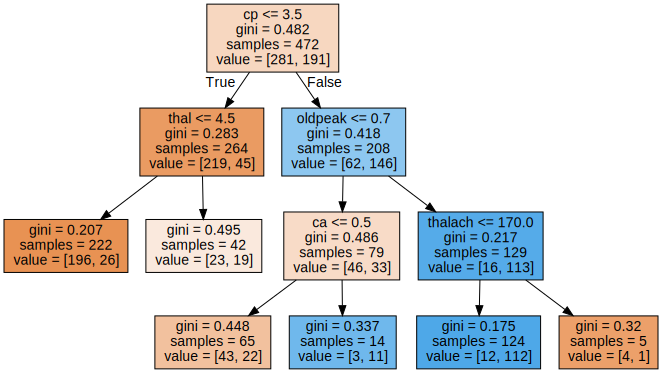

In [ ]:
dot_file = export_graphviz(C_dt_gini_postp, feature_names=list(df_heartdisease.columns)[:13],filled=True)
graph = graphviz.Source(dot_file)
graph

In [ ]:
Convert_Classification_tree_to_if_else(C_dt_gini_postp,'C_dt_gini_postp')

In [ ]:
def tree_if_else(datapoint):
	x=datapoint
	if x[2] <= 3.5:
		if x[12] <= 4.5:
			return 0
		else:
			return 0
	else:
		if x[9] <= 0.7000000178813934:
			if x[11] <= 0.5:
				return 0
			else:
				return 1
		else:
			if x[7] <= 170.0:
				return 1
			else:
				return 0


y_pre=[]
for i in C_X_test.values:
  y_pre.append(tree_if_else(i))
accuracy_score(C_y_test,y_pre)

0.7796610169491526

###**Regression**

In [6]:
#Tìm alpha tối ưu
R_dt_entropy_postp=DecisionTreeRegressor()
path = R_dt_entropy_postp.cost_complexity_pruning_path(R_X_train,R_y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

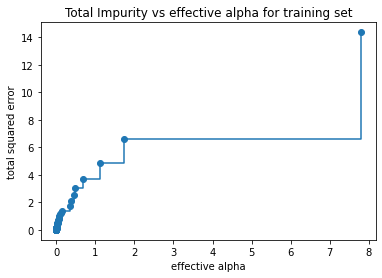

In [7]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total squared error")
ax.set_title("Total Impurity vs effective alpha for training set")

In [8]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(R_X_train,R_y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 11.231041617462859


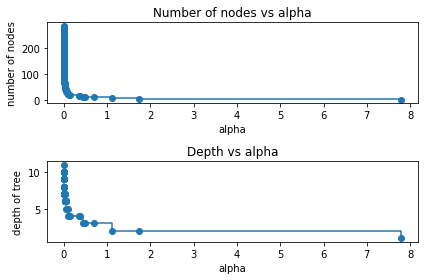

In [9]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


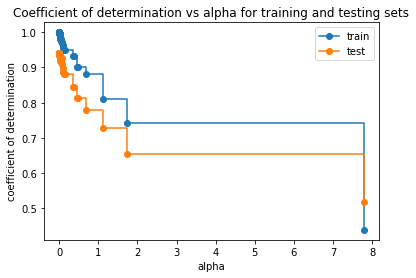

In [10]:
train_scores = [clf.score(R_X_train,R_y_train) for clf in clfs]
test_scores = [clf.score(R_X_test,R_y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("coefficient of determination")
ax.set_title("Coefficient of determination vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

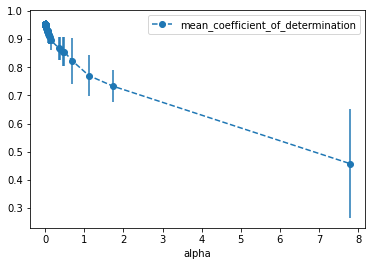

In [11]:
alpha_loop_values=[]

for ccp_alpha in ccp_alphas:
  clf_dt=DecisionTreeRegressor(random_state=0,ccp_alpha=ccp_alpha)
  scores=cross_val_score(clf_dt, R_X,R_y,cv=5)
  alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,columns=['alpha','mean_coefficient_of_determination','std'])

alpha_results.plot(x='alpha',y='mean_coefficient_of_determination',yerr='std',marker='o',linestyle='--')

In [12]:
ideal_alpha=alpha_results[alpha_results['mean_coefficient_of_determination']==np.max(alpha_results['mean_coefficient_of_determination'])]
ideal_alpha.values[0][0]

0.0

In [13]:
R_dt_postp=DecisionTreeRegressor(ccp_alpha=ideal_alpha.values[0][0])
R_dt_postp.fit(R_X_train,R_y_train)

DecisionTreeRegressor()

In [14]:
y_pre=R_dt_postp.predict(R_X_test)
explained_variance_score(R_y_test,y_pre)

0.9413357397268574

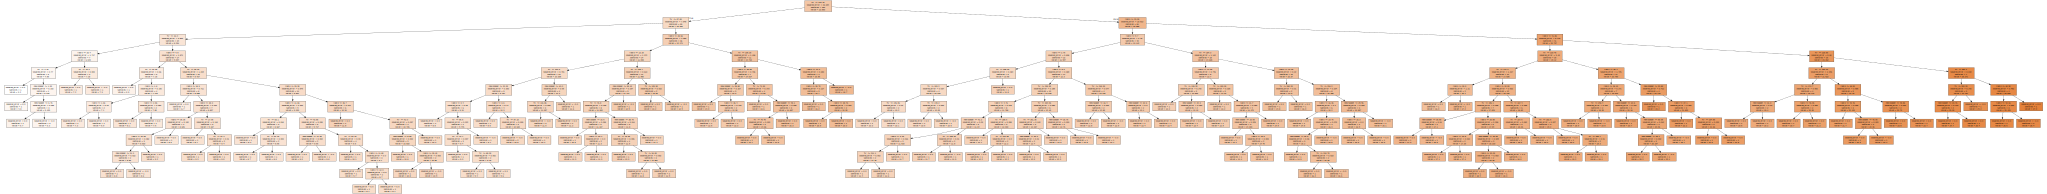

In [15]:
dot_file = export_graphviz(R_dt_postp, feature_names=data.columns[:3].values,filled=True)
graph = graphviz.Source(dot_file)
graph
#graph.render(filename='regression_tree', format='png', cleanup=True)

In [19]:
Convert_Regression_tree_to_if_else(R_dt_postp,'R_dt_postp')

In [20]:
def tree_if_else(datapoint):
	x=datapoint
	if x[0] <= 107.20000076293945:
		if x[0] <= 30.050000190734863:
			if x[1] <= 32.499999046325684:
				if x[0] <= 18.0:
					if x[0] <= 15.200000286102295:
						if x[2] <= 5.749999761581421:
							return 5.7
						else:
							if x[2] <= 33.500000953674316:
								return 5.3
							else:
								if x[2] <= 45.5:
									return 5.5
								else:
									return 5.6
					else:
						return 5.9
				else:
					if x[2] <= 18.850000381469727:
						return 7.6
					else:
						if x[2] <= 26.0:
							if x[0] <= 23.449999809265137:
								return 6.6
							else:
								return 6.9
						else:
							if x[1] <= 16.350000381469727:
								if x[0] <= 26.800000190734863:
									return 7.2
								else:
									return 7.3
							else:
								return 7.0
			else:
				if x[0] <= 12.349999904632568:
					return 6.6
				else:
					if x[0] <= 20.84999942779541:
						if x[0] <= 17.550000190734863:
							if x[1] <= 44.80000114440918:
								return 8.7
							else:
								return 9.3
						else:
							return 8.0
					else:
						if x[0] <= 24.699999809265137:
							return 9.2
						else:
							return 9.5
		else:
			if x[1] <= 28.15000057220459:
				if x[1] <= 13.700000286102295:
					if x[0] <= 57.89999961853027:
						if x[0] <= 54.85000038146973:
							if x[2] <= 19.899999618530273:
								return 8.4
							else:
								return 8.1
						else:
							return 8.7
					else:
						if x[1] <= 8.600000143051147:
							if x[0] <= 92.29999923706055:
								if x[2] <= 19.000000476837158:
									if x[2] <= 12.0:
										return 8.8
									else:
										return 9.4
								else:
									if x[0] <= 78.25:
										return 8.6
									else:
										return 8.7
							else:
								if x[0] <= 101.04999923706055:
									if x[1] <= 3.200000047683716:
										if x[1] <= 1.449999988079071:
											return 9.5
										else:
											return 9.6
									else:
										return 9.7
								else:
									return 10.4
						else:
							if x[0] <= 81.3499984741211:
								if x[2] <= 12.149999618530273:
									return 9.9
								else:
									return 9.7
							else:
								if x[2] <= 14.749999761581421:
									return 10.7
								else:
									return 10.6
				else:
					if x[0] <= 72.95000076293945:
						if x[0] <= 43.04999923706055:
							if x[2] <= 11.350000023841858:
								return 9.5
							else:
								return 9.6
						else:
							if x[1] <= 21.350000381469727:
								return 10.5
							else:
								return 10.1
					else:
						if x[2] <= 56.150001525878906:
							if x[2] <= 27.399999618530273:
								return 11.8
							else:
								if x[1] <= 17.549999713897705:
									return 11.4
								else:
									return 11.3
						else:
							return 12.9
			else:
				if x[0] <= 68.10000228881836:
					if x[0] <= 46.39999961853027:
						if x[0] <= 42.0:
							return 10.8
						else:
							return 10.4
					else:
						if x[0] <= 62.650001525878906:
							if x[1] <= 39.89999961853027:
								return 11.8
							else:
								return 11.6
						else:
							return 12.5
				else:
					if x[1] <= 39.64999961853027:
						if x[1] <= 32.30000019073486:
							return 14.0
						else:
							if x[2] <= 51.0:
								return 13.3
							else:
								return 12.6
					else:
						if x[2] <= 40.64999961853027:
							return 13.6
						else:
							if x[1] <= 46.45000076293945:
								return 15.3
							else:
								return 14.7
	else:
		if x[1] <= 26.84999942779541:
			if x[1] <= 10.050000190734863:
				if x[1] <= 2.8499999046325684:
					if x[1] <= 2.3499999046325684:
						if x[1] <= 1.5999999642372131:
							return 10.1
						else:
							if x[2] <= 17.800000190734863:
								return 10.3
							else:
								return 10.3
					else:
						return 10.6
				else:
					if x[1] <= 7.6499998569488525:
						if x[0] <= 229.89999389648438:
							if x[0] <= 151.3499984741211:
								if x[0] <= 131.8499984741211:
									return 11.0
								else:
									return 11.2
							else:
								if x[1] <= 3.450000047683716:
									if x[2] <= 23.84999942779541:
										return 11.5
									else:
										return 11.4
								else:
									if x[1] <= 4.75:
										return 11.7
									else:
										if x[2] <= 16.09999990463257:
											return 11.7
										else:
											return 12.2
						else:
							if x[2] <= 14.0:
								return 12.8
							else:
								if x[0] <= 251.3499984741211:
									if x[1] <= 4.599999904632568:
										return 12.3
									else:
										return 12.5
								else:
									return 12.0
					else:
						if x[0] <= 216.3499984741211:
							if x[0] <= 171.3000030517578:
								return 12.6
							else:
								if x[0] <= 191.9499969482422:
									return 12.8
								else:
									return 12.9
						else:
							return 13.4
			else:
				if x[0] <= 140.3000030517578:
					if x[2] <= 21.100000381469727:
						if x[2] <= 10.900000095367432:
							return 13.4
						else:
							return 13.2
					else:
						if x[1] <= 15.849999904632568:
							if x[2] <= 28.65000057220459:
								return 12.2
							else:
								return 12.4
						else:
							return 11.9
				else:
					if x[1] <= 19.199999809265137:
						if x[2] <= 4.400000095367432:
							return 14.1
						else:
							if x[2] <= 25.90000057220459:
								if x[2] <= 12.149999856948853:
									return 15.0
								else:
									if x[1] <= 17.65000057220459:
										if x[2] <= 19.649999618530273:
											return 14.7
										else:
											return 14.8
									else:
										return 14.9
							else:
								if x[1] <= 16.34999990463257:
									return 14.8
								else:
									if x[2] <= 45.94999885559082:
										return 15.5
									else:
										return 15.2
					else:
						if x[0] <= 192.70000457763672:
							if x[1] <= 22.5:
								if x[0] <= 186.3499984741211:
									return 15.5
								else:
									return 15.6
							else:
								if x[0] <= 144.3000030517578:
									return 15.5
								else:
									return 14.6
						else:
							if x[0] <= 207.9499969482422:
								return 16.6
							else:
								if x[1] <= 21.800000190734863:
									return 17.4
								else:
									if x[2] <= 35.34999942779541:
										return 17.0
									else:
										return 17.1
		else:
			if x[0] <= 194.54999542236328:
				if x[0] <= 128.4000015258789:
					if x[1] <= 35.75:
						if x[1] <= 31.549999237060547:
							return 14.2
						else:
							return 15.2
					else:
						if x[2] <= 57.30000114440918:
							return 16.7
						else:
							if x[1] <= 38.75:
								return 15.9
							else:
								return 16.0
				else:
					if x[1] <= 34.400001525878906:
						if x[0] <= 159.9499969482422:
							return 15.0
						else:
							if x[1] <= 31.05000114440918:
								return 17.3
							else:
								return 17.1
					else:
						if x[0] <= 165.1500015258789:
							if x[2] <= 52.20000076293945:
								if x[2] <= 37.40000057220459:
									if x[1] <= 36.19999885559082:
										return 17.3
									else:
										return 18.0
								else:
									return 17.2
							else:
								if x[0] <= 144.6999969482422:
									return 19.2
								else:
									return 18.5
						else:
							if x[1] <= 44.10000038146973:
								if x[0] <= 169.0500030517578:
									return 19.6
								else:
									if x[0] <= 182.5:
										return 19.0
									else:
										return 19.2
							else:
								return 21.2
			else:
				if x[1] <= 35.29999923706055:
					if x[0] <= 237.79999542236328:
						if x[1] <= 31.449999809265137:
							if x[1] <= 27.600000381469727:
								return 18.9
							else:
								if x[2] <= 46.05000114440918:
									if x[2] <= 24.000000476837158:
										return 18.4
									else:
										return 18.3
								else:
									return 18.0
						else:
							if x[0] <= 218.75:
								if x[0] <= 210.9000015258789:
									return 19.0
								else:
									return 19.4
							else:
								if x[2] <= 41.5:
									return 20.1
								else:
									if x[0] <= 224.6500015258789:
										return 19.6
									else:
										return 19.7
					else:
						if x[0] <= 268.20001220703125:
							if x[1] <= 31.549999237060547:
								if x[2] <= 10.699999809265137:
									return 19.8
								else:
									return 20.2
							else:
								return 20.7
						else:
							if x[0] <= 293.25:
								if x[1] <= 28.59999942779541:
									return 21.4
								else:
									return 20.8
							else:
								return 20.7
				else:
					if x[0] <= 256.09999084472656:
						if x[1] <= 48.35000038146973:
							if x[1] <= 43.45000076293945:
								if x[2] <= 36.69999885559082:
									if x[1] <= 37.85000038146973:
										return 21.5
									else:
										if x[2] <= 28.5:
											return 21.8
										else:
											return 21.7
								else:
									if x[1] <= 39.75:
										if x[2] <= 70.75:
											return 22.1
										else:
											return 22.2
									else:
										return 22.6
							else:
								if x[2] <= 23.40000057220459:
									return 22.6
								else:
									if x[2] <= 40.05000114440918:
										return 22.3
									else:
										return 22.4
						else:
							if x[0] <= 215.5500030517578:
								if x[1] <= 49.5:
									return 23.7
								else:
									return 23.8
							else:
								return 24.7
					else:
						if x[2] <= 46.5:
							return 27.0
						else:
							if x[0] <= 293.0500030517578:
								if x[0] <= 272.4499969482422:
									return 24.2
								else:
									if x[0] <= 286.65000915527344:
										return 25.5
									else:
										return 25.4
							else:
								return 23.8

y_pre=[]
for i in R_X_test:
  y_pre.append(tree_if_else(i))
explained_variance_score(R_y_test,y_pre)

0.9774974570245114